# Viewing and manipulating FITS images in Python

##### This notebook started life as a tutorial on the [astropy tutorials](http://www.astropy.org/astropy-tutorials/FITS-tables.html) page, and was originally written by [Lia R. Corrales](http://user.astro.columbia.edu/~lia/).

We'll need to import some basic modules to do this; note that `%matplotlib inline` causes images to appear in the notebook.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In order to handle FITS images in python, we'll need the `fits` module from `astropy`:

In [2]:
from astropy.io import fits

The following is optional, and will only work if you have [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/) installed on your machine, but is a significant improvement over the matplotlib defaults.

In [3]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

# Downloading the data

Go to the [SDSS website](http://dr10.sdss3.org/fields/) and download the image of your choice from the SDSS catalog.  Here we'll use M42, the Orion Nebula, which looks like this: 

<img src="http://hummel.github.io/images/orion.jpg">

**You will need to unzip the files!!!**  The FITS images you download will be compressed (with a `.gz` or `.bz2` extension).  You'll need to extract the file using the program of your choice before proceeding.

Make sure you're in the correct directory (on your machine):

In [4]:
pwd

u'/Users/jah128/Documents/ta/AST376/labs'

In [5]:
ls

Oct02.ipynb   Sept11.py     Sept25.html   Sept30.ipynb
README.md     Sept16.py     Sept25.ipynb  data/


In [6]:
ls data

frame-g-006073-4-0063.fits.bz2  frame-r-006073-4-0063.fits.bz2
frame-i-006073-4-0063.fits.bz2  frame-u-006073-4-0063.fits.bz2
frame-irg-006073-4-0063.jpg     frame-z-006073-4-0063.fits.bz2


###### Notice how all of the fits files have that `.bz2` extension.  We'll need to extract them to proceed.

In [7]:
ls data

frame-g-006073-4-0063.fits      frame-r-006073-4-0063.fits.bz2
frame-g-006073-4-0063.fits.bz2  frame-u-006073-4-0063.fits
frame-i-006073-4-0063.fits      frame-u-006073-4-0063.fits.bz2
frame-i-006073-4-0063.fits.bz2  frame-z-006073-4-0063.fits
frame-irg-006073-4-0063.jpg     frame-z-006073-4-0063.fits.bz2
frame-r-006073-4-0063.fits


###### Having extracted the uncompressed fits files, we are now ready to proceed.

## Opening FITS files and loading the image data

Let's open the g-band FITS file and find out what it contains.

In [8]:
hdu_list = fits.open("data/frame-g-006073-4-0063.fits")
hdu_list.info()

Filename: data/frame-g-006073-4-0063.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      96   (2048, 1489)   float32   
1                ImageHDU         6   (2048,)      float32   
2                BinTableHDU     27   1R x 3C      [49152E, 2048E, 1489E]   
3                BinTableHDU     79   1R x 31C     [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


Generally the image information is located in the <code>PRIMARY</code> block. The blocks are numbered and can be accessed by indexing <code>hdu_list</code>.

In [9]:
image_data = hdu_list[0].data

You data is now stored as a 2-D numpy array.  Want to know the dimensions of the image?  Just look at the `shape` of the array.

In [10]:
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(1489, 2048)


At this point, we can just close the FITS file.  We have stored everything we wanted to a variable.

In [11]:
hdu_list.close()

### SHORTCUT

If you don't need to examine the FITS header, you can call `fits.getdata` to bypass the previous steps.

In [12]:
image_data = fits.getdata("data/frame-g-006073-4-0063.fits")
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(1489, 2048)


## Let's get some basic statistics about our image

In [13]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

('Min:', 0.037841797)
('Max:', 208.25)
('Mean:', 6.6654449)
('Stdev:', 19.653004)


## Viewing the image

<matplotlib.colorbar.Colorbar instance at 0x10bcc98c0>

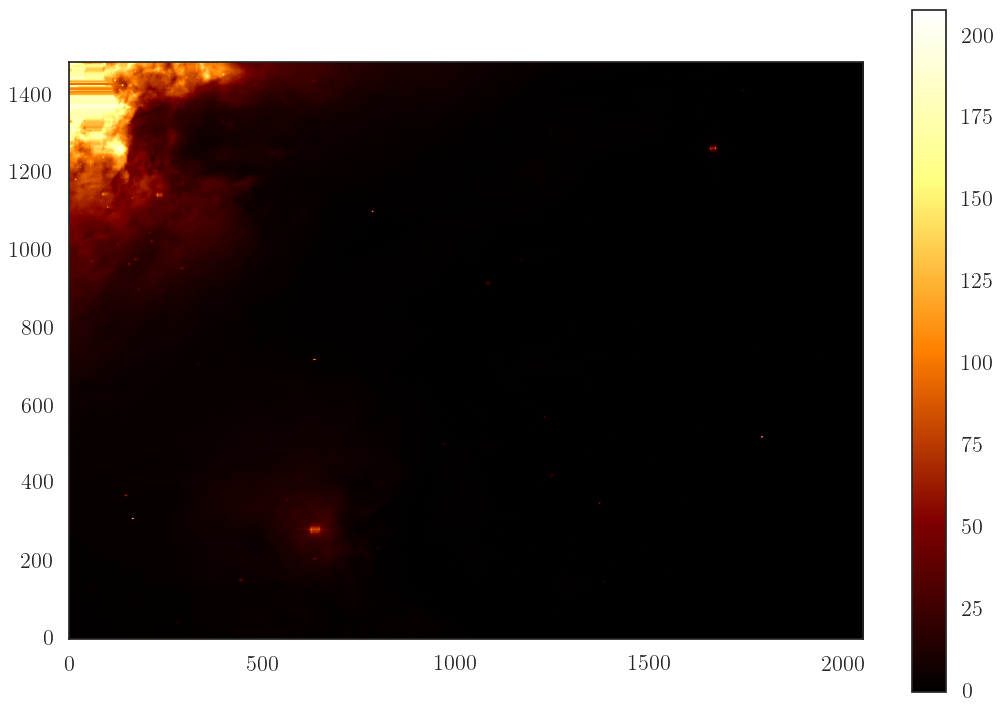

In [14]:
plt.imshow(image_data, cmap='afmhot', origin='lower')
plt.colorbar()
# To see more color maps go to http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

Unforturnately, we can't really see much here because of the color range.  Lets adjust that manually and see what happens.

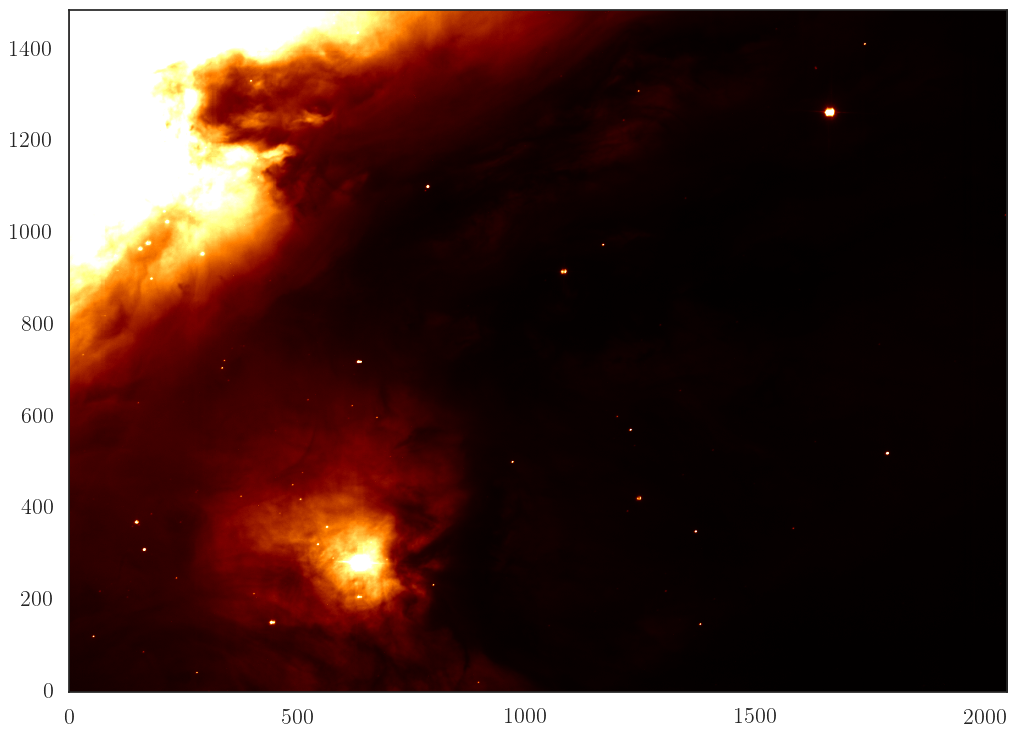

In [15]:
plt.imshow(image_data, cmap='afmhot', origin='lower')
plt.clim(0,30)

###### Play around with the color limits until you find the best range of values.  Looking at the x-range of the histogram below will help you get some idea where most of the dynamic range of the image is.  In this image it's all near, but greater than 0.  That won't necessarily be the case for all images.

## Plotting a histogram

To make a histogram with `matplotlib.pyplot.hist()`, you need to cast the data from a 2-D to array to something one dimensional.

Here we'll use the iterable python object `image_data.flat`.

In [16]:
print(type(image_data.flat))

<type 'numpy.flatiter'>


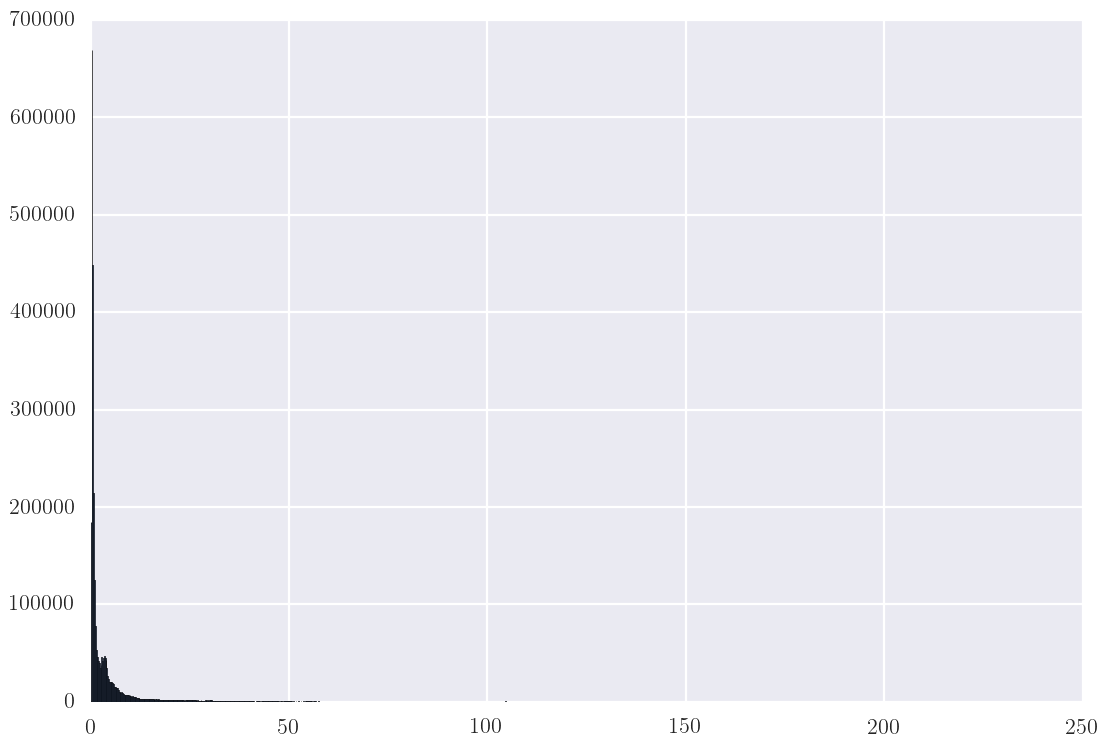

In [17]:
NBINS = 1000
with sns.axes_style("darkgrid"):
    histogram = plt.hist(image_data.flat, NBINS)

## Displaying the image with a logarithmic scale

When looking at images with a large dynamic range, it is often useful to rescale the image.  Logarithmic scaling basically does this to the pixel counts:

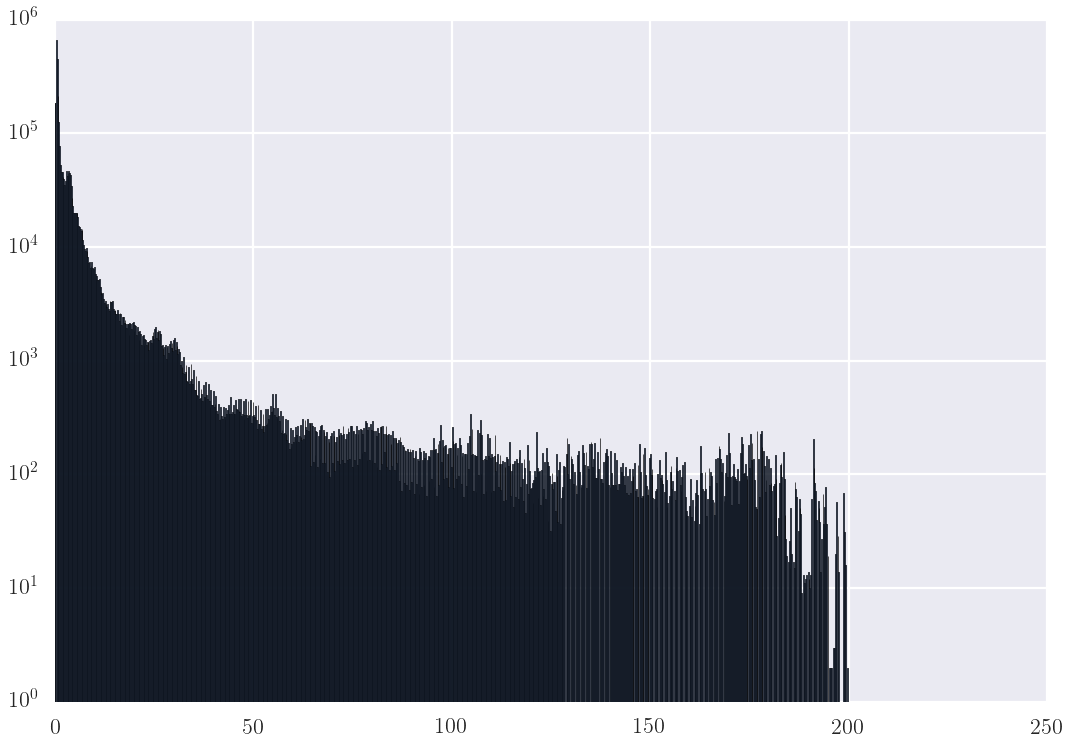

In [18]:
NBINS = 1000
with sns.axes_style("darkgrid"):
    histogram = plt.hist(image_data.flat, NBINS)
    plt.yscale('log', nonposy='clip') #Same histogram, just with logarithmic scaling on the y-axis.

To get a logarithmically scaled image, we need to load the `LogNorm` object from `matplotlib`.

In [19]:
from matplotlib.colors import LogNorm

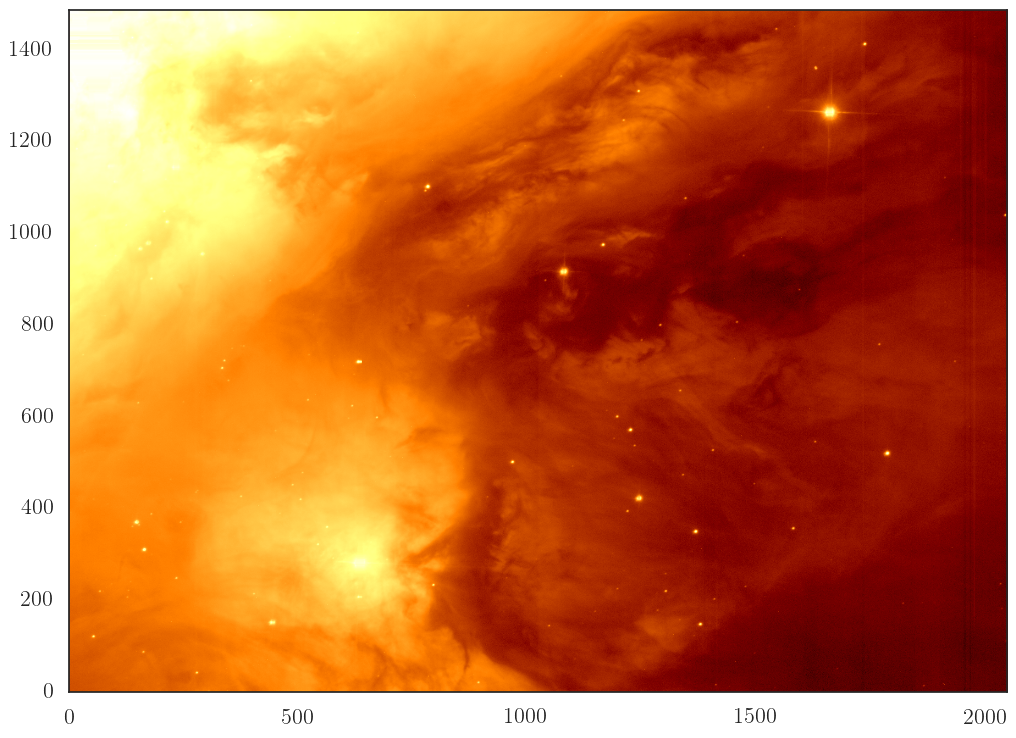

In [20]:
plt.imshow(image_data, cmap='afmhot', norm=LogNorm(), origin='lower')

###### See how much more detail you can see now?  And we didn't even have to play with the color range!